In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
city = 'bogota'

In [118]:
time = pd.read_csv( './data/meta/time.csv' )

In [119]:
time[ 'date' ] = pd.to_datetime( time[ 'date' ], format = '%d/%m/%Y' )

In [120]:
time.dtypes

date    datetime64[ns]
time             int64
dtype: object

In [121]:
time.head()

,date,time
0,2020-03-14,1
1,2020-03-15,2
2,2020-03-16,3
3,2020-03-17,4
4,2020-03-18,5


In [122]:
filename = ''
if city == 'bogota':
    filename = 'BOG'
elif city == 'barranquilla':
    filename = 'BQUILLA'
elif city == 'cali':
    filename = 'CALI'
    
meta = pd.read_csv( './data/meta/{}.csv'.format( filename ) )

In [123]:
del meta[ 'Unnamed: 0' ]

In [124]:
meta.shape

(1120, 11)

In [125]:
meta.dtypes

replicate      int64
time           int64
S            float64
E            float64
A            float64
I1           float64
I2           float64
I3           float64
R            float64
D            float64
obs          float64
dtype: object

In [126]:
meta.head( 20 )

,replicate,time,S,E,A,I1,I2,I3,R,D,obs
0,1,0,1.028736e+06,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,1,1.028734e+06,1.980980,0.109658,1.823569,-0.012334,-0.000310,0.192698,-0.000005,NaN
2,1,2,1.028731e+06,3.939094,0.406790,1.826335,-0.015082,-0.000949,0.396771,-0.000037,NaN
3,1,3,1.028728e+06,6.426920,0.895124,2.006726,-0.003282,-0.001335,0.649160,-0.000096,NaN
4,1,4,1.028723e+06,9.986353,1.633959,2.406750,0.028699,-0.000709,0.992601,-0.000153,NaN
5,1,5,1.028715e+06,15.302678,2.738326,3.112044,0.088873,0.001919,1.485446,-0.000134,NaN
6,1,6,1.028703e+06,23.354434,4.394699,4.263970,0.189465,0.007899,2.213080,0.000094,0.0
7,1,7,1.028685e+06,35.602016,6.892154,6.083664,0.349348,0.019145,3.303647,0.000743,0.0
8,1,8,1.028657e+06,54.256406,10.673223,8.911333,0.597604,0.038468,4.951230,0.002143,0.0
9,1,9,1.028615e+06,82.679971,16.412974,13.267412,0.978867,0.070059,7.450813,0.004793,1.0


In [127]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

meta_grouped = meta.groupby( 'time' ).agg( { 'obs': [ 'mean', ci ] } ).reset_index().fillna( 0 )
meta_grouped.columns = [ '_'.join( col ).strip() for col in meta_grouped.columns.values ]
meta_grouped.rename( columns = { 'time_': 'time' }, inplace = True )

In [128]:
meta_grouped = meta_grouped.merge( time, how = 'left', on = 'time' )

In [129]:
meta_grouped = meta_grouped.loc[ meta_grouped[ 'date' ].notnull() ]

In [130]:
meta_grouped[ 'obs_lower' ] = meta_grouped[ 'obs_mean' ] - meta_grouped[ 'obs_ci' ]
meta_grouped[ 'obs_upper' ] = meta_grouped[ 'obs_mean' ] + meta_grouped[ 'obs_ci' ]

In [131]:
meta_grouped[ 'city' ] = city

In [132]:
meta_grouped.head()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper,city
1,1,0.0,0.0,2020-03-14,0.0,0.0,bogota
2,2,0.0,0.0,2020-03-15,0.0,0.0,bogota
3,3,0.0,0.0,2020-03-16,0.0,0.0,bogota
4,4,0.0,0.0,2020-03-17,0.0,0.0,bogota
5,5,0.0,0.0,2020-03-18,0.0,0.0,bogota


In [133]:
meta_grouped.tail()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper,city
107,107,631.9,13.288887,2020-06-28,618.611113,645.188887,bogota
108,108,646.2,18.653599,2020-06-29,627.546401,664.853599,bogota
109,109,702.3,19.771825,2020-06-30,682.528175,722.071825,bogota
110,110,729.1,19.056301,2020-07-01,710.043699,748.156301,bogota
111,111,765.3,14.049386,2020-07-02,751.250614,779.349386,bogota


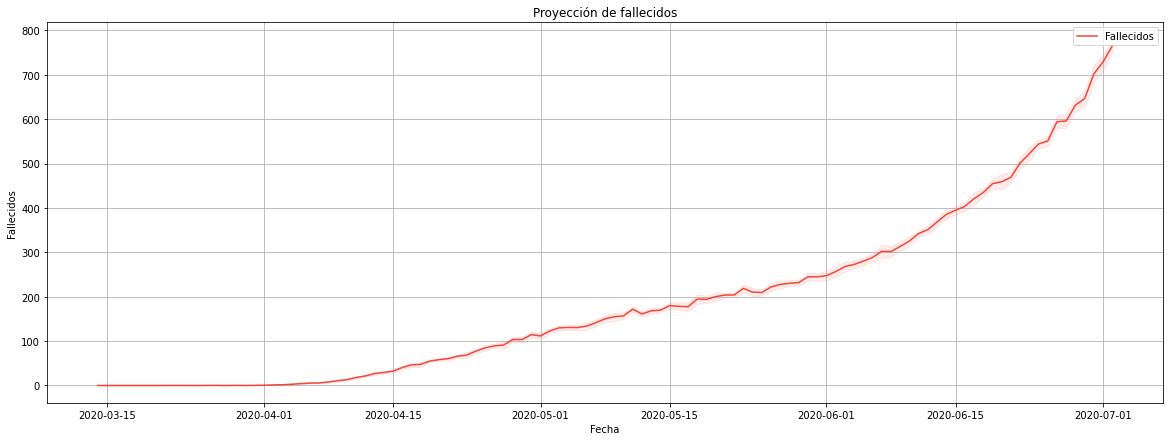

In [134]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( meta_grouped[ 'date' ], meta_grouped[ 'obs_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( meta_grouped[ 'date' ], meta_grouped[ 'obs_lower' ], meta_grouped[ 'obs_upper' ], color = '#f64438', alpha = .1 )

plt.title( 'Proyección de fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Fallecidos' )
plt.grid( True )
plt.legend()

In [135]:
meta_grouped.to_csv( './data/meta/meta_{}.csv'.format( city ), index = False )

In [ ]:
projections = meta[ [ 'replicate', 'time', 'obs' ] ].fillna( 0 ).merge( time, how = 'left', on = 'time' )
projections.rename( columns = { 'obs': 'fallecidos' }, inplace = True )
projections = projections.loc[ projections[ 'date' ].notnull() ]
projections.to_csv( './meta-viz/data/{}-meta.csv'.format( city ), index = False )

In [ ]:
meta.groupby( 'time' ).agg( { 'D': [ 'min', 'mean', 'median', 'max', percentile( 25 ), percentile( 75 ) ], 'obs': [ 'min', 'mean', 'median', 'max', percentile( 25 ), percentile( 75 ) ] } ).tail( 10 )

In [ ]:
to_export = meta.loc[ meta[ 'replicate' ] == 1 ][ [ 'time', 'I2', 'I3', 'D' ] ].round( 0 )

In [ ]:
to_export[ 'I2' ] = to_export[ 'I2' ].astype( int )
to_export[ 'I3' ] = to_export[ 'I3' ].astype( int )
to_export[ 'D' ] = to_export[ 'D' ].astype( int )

In [ ]:
to_export.tail()

In [ ]:
to_export = to_export.iloc[ 1: ]

In [ ]:
to_export.tail()

In [ ]:
real = pd.read_csv( './data/meta/old2/BOG17jun.csv' )

In [ ]:
real.shape

In [ ]:
real[ 'date' ] = pd.to_datetime( real[ 'date' ], format = '%d/%m/%Y' )

In [ ]:
real.dtypes

In [ ]:
real.head()

In [ ]:
to_export = real.merge( to_export, how = 'outer', on = 'time' )

In [ ]:
to_export.rename( columns = { 'date': 'Fecha', 'obs': 'Fallecidos_reales', 'D': 'Fallecidos', 'I2': 'Graves', 'I3': 'Críticos' }, inplace = True )

In [ ]:
def impute_date( x ):
    if pd.isnull( x[ 'Fecha' ] ):
        return max( to_export[ 'Fecha' ] ) + pd.DateOffset( x[ 'time' ] - 96 )
    else:
        return x[ 'Fecha' ]
    
to_export[ 'Fecha' ] = to_export.apply( lambda x: impute_date( x ), axis = 1 )

In [ ]:
to_export.tail( 25 )

In [ ]:
to_export = pd.melt( to_export, id_vars=[ 'Fecha' ], value_vars = [ 'Fallecidos_reales', 'Graves', 'Críticos', 'Fallecidos' ] )

In [ ]:
#to_export.drop_duplicates( subset = [ 'value' ], inplace = True )

In [ ]:
to_export.head()

In [ ]:
to_export.to_csv( './agents-viz/data/meta.csv', index = False )